# LOESS
This notebook illustrates a Python/NumPy implementation of the LOESS locally-weighted linear regression as defined by [NIST](https://www.itl.nist.gov/div898/handbook/pmd/section1/dep/dep144.htm)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

Define the default chart size for this notebook.

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

### Generate a sample signal
Note that the *x* coordinates are sampled from a uniform random number generator and scaled appropriately. This simulates an irregularly sampled signal.

In [5]:
x_noise = np.sort(np.random.sample(200) * 2.0 * math.pi) # np.arange(0, 2 * math.pi, math.pi / 60)
y_signal =  2 * np.sin(x_noise)
y_noise = y_signal + np.random.normal(0,0.5,x_noise.shape[0])

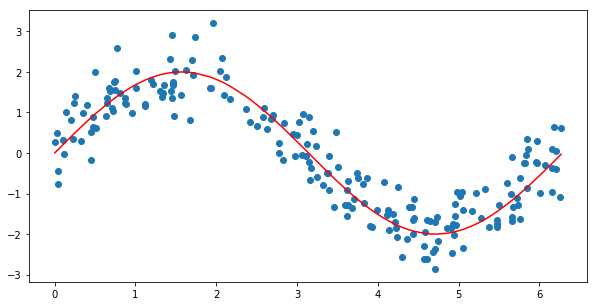

In [6]:
plt.scatter(x_noise, y_noise)
plt.plot(x_noise, y_signal, "r")

### The Tricubic Weighing Function


In [16]:
def tricubic(x):
    if x <= -1.0 or x >= 1.0:
        return 0.0
    else:
        return math.pow(1.0 - math.pow(abs(x), 3), 3)

In [15]:
def get_min_range(distances, window):
    min_idx = np.argsort(distances)[:window]
    return np.sort(min_idx)

In [17]:
def get_max_distance(distances, rng):
    return np.max(distances[rng[0]:rng[1] + 1])

In [18]:
def get_weights(distances, min_range):
    n = min_range[1] - min_range[0] + 1
    max_distance = np.max(distances[min_range[0]:min_range[1] + 1])
    weights = np.zeros(n)

    for i in range(n):
        weights[i] = tricubic(distances[min_range[0] + i] / max_distance)
    return weights 

In [19]:
def normalize_array(array, min_val, max_val):
    return (array - min_val) / (max_val - min_val)

In [20]:
def normalize_x(value, min_x, max_x):
    return (value - min_x) / (max_x - min_x)

In [21]:
def denormalize_y(value, min_y, max_y):
    return value * (max_y - min_y) + min_y

In [22]:
def estimate(x, xx, yy, window):
    # Normalize the x input and the xx array
    min_x = np.min(xx)
    max_x = np.max(xx)
    n_xx = normalize_array(xx, min_x, max_x) 
    n_x = normalize_x(x, min_x, max_x)
    
    # Normalize the yy array
    min_y = np.min(yy)
    max_y = np.max(yy)
    n_yy = normalize_array(yy, min_y, max_y)
    
    distances = np.abs(n_xx - n_x)
    min_range = get_min_range(distances, window)
    weights = get_weights(distances, min_range)

    sum_weight = 0.0
    sum_weight_x = 0.0
    sum_weight_y = 0.0
    sum_weight_x2 = 0.0
    sum_weight_xy = 0.0

    for i in range(min_range[0], min_range[1] + 1):
        w = weights[i - min_range[0]]
        sum_weight += w
        sum_weight_x += n_xx[i] * w
        sum_weight_y += n_yy[i] * w
        sum_weight_x2 += n_xx[i] * n_xx[i] * w
        sum_weight_xy += n_xx[i] * n_yy[i] * w

    mean_x = sum_weight_x / sum_weight
    mean_y = sum_weight_y / sum_weight

    b = (sum_weight_xy - mean_x * mean_y * sum_weight) / (sum_weight_x2 - mean_x * mean_x * sum_weight)
    a = mean_y - b * mean_x

    y = a + b * n_x
    return denormalize_y(y, min_y, max_y)

In [23]:
xx = np.array([0.5578196, 2.0217271, 2.5773252, 3.4140288, 4.3014084, 4.7448394, 5.1073781, 
               6.5411662, 6.7216176, 7.2600583, 8.1335874, 9.1224379, 11.9296663, 12.3797674,
               13.2728619, 14.2767453, 15.3731026, 15.6476637, 18.5605355, 18.5866354, 18.7572812])

In [24]:
yy = np.array([18.63654, 103.49646, 150.35391, 190.51031, 208.70115, 213.71135, 228.49353,
               233.55387, 234.55054, 223.89225, 227.68339, 223.91982, 168.01999, 164.95750,
               152.61107, 160.78742, 168.55567, 152.42658, 221.70702, 222.69040, 243.18828])

In [25]:
y = estimate(1.0, xx, yy, 5)

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
y